In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.DataFrame()

In [3]:
folder = 'Ungrouped_Data_ver2_Result'

method_list = os.listdir(folder)

for method_folder_name in method_list:
    method_path = os.path.join(folder, method_folder_name)
    print('method path:', method_path)
    
    method_sub_list = os.listdir(method_path)
    print('method sub list:', method_sub_list)
    
    for initial_folder_name in method_sub_list:
      
        initial_cont_num = int(initial_folder_name.split('_')[1])
        total_cont_num = int(initial_folder_name.split('(')[0].split('_')[-1])
        new_cont_num = total_cont_num - initial_cont_num
        
        initial_folder_path = os.path.join(method_path, initial_folder_name)

        
        if method_folder_name == "MIP":
            alpha_beta_folder_lsit = os.listdir(initial_folder_path)
            
            for alpha_beta_folder_name in alpha_beta_folder_lsit:
                alpha_value = alpha_beta_folder_name.split('_')[1]
                beta_value = alpha_beta_folder_name.split('_')[3]
                
                alpha_beta_folder_path = os.path.join(initial_folder_path, alpha_beta_folder_name)
                print(alpha_beta_folder_path)
                # Get only .csv files
                csv_list = [csv for csv in os.listdir(alpha_beta_folder_path) if csv.endswith('.csv')]
                print('csv_list:', csv_list)
                
                for csv_name in csv_list:
    
                    ex_num = int(csv_name.split('.')[0].split('_ex')[1])
                    csv_path = os.path.join(alpha_beta_folder_path, csv_name)

                    # Read csv file
                    csv_data = pd.read_csv(csv_path)
                    
                    csv_data['total_cont_num'] = total_cont_num
                    csv_data['initial_cont_num'] = initial_cont_num
                    csv_data['new_cont_num'] = new_cont_num
                    csv_data['ex_num'] = ex_num
                    csv_data['method'] = method_folder_name
                    csv_data['alpha'] = alpha_value
                    csv_data['beta'] = beta_value
                    
                    # concat csv_data to data
                    data = pd.concat([data, csv_data]).reset_index(drop=True)
        
        else:
            # get all csv file
            csv_list = [csv for csv in os.listdir(initial_folder_path) if csv.endswith('.csv')]
            
            for csv_name in csv_list:
                ex_num = int(csv_name.split('.')[0].split('_ex')[1])
                
                csv_path = os.path.join(initial_folder_path, csv_name)

                # Read csv file
                csv_data = pd.read_csv(csv_path)
                
                csv_data['total_cont_num'] = total_cont_num
                csv_data['initial_cont_num'] = initial_cont_num
                csv_data['new_cont_num'] = new_cont_num
                csv_data['ex_num'] = ex_num
                csv_data['method'] = method_folder_name
                csv_data['alpha'] = '-'
                csv_data['beta'] = '-'
                
                data = pd.concat([data, csv_data]).reset_index(drop=True)

data.head()

method path: Ungrouped_Data_ver2_Result\Heuristic_1
method sub list: ['Initial_0_Ouptput_Data_10(stack_6_tier_5)', 'Initial_0_Ouptput_Data_15(stack_6_tier_5)', 'Initial_0_Ouptput_Data_20(stack_6_tier_5)', 'Initial_0_Ouptput_Data_23(stack_6_tier_5)', 'Initial_0_Ouptput_Data_25(stack_6_tier_5)', 'Initial_0_Ouptput_Data_27(stack_6_tier_5)', 'Initial_0_Ouptput_Data_5(stack_6_tier_5)', 'Initial_0_Ouptput_Data_7(stack_6_tier_5)', 'Initial_10_Ouptput_Data_15(stack_6_tier_5)', 'Initial_10_Ouptput_Data_20(stack_6_tier_5)', 'Initial_10_Ouptput_Data_23(stack_6_tier_5)', 'Initial_10_Ouptput_Data_25(stack_6_tier_5)', 'Initial_10_Ouptput_Data_27(stack_6_tier_5)', 'Initial_15_Ouptput_Data_23(stack_6_tier_5)', 'Initial_15_Ouptput_Data_25(stack_6_tier_5)', 'Initial_15_Ouptput_Data_27(stack_6_tier_5)', 'Initial_2_Ouptput_Data_5(stack_6_tier_5)', 'Initial_2_Ouptput_Data_7(stack_6_tier_5)', 'Initial_3_Ouptput_Data_10(stack_6_tier_5)', 'Initial_3_Ouptput_Data_15(stack_6_tier_5)', 'Initial_3_Ouptput_Data_20

,Idx,Initial_Loc_x,Initial_Loc_y,Initial_Loc_z,Initial_Rot_x,Initial_Rot_y,Initial_Rot_z,Later_Loc_x,Later_Loc_y,Later_Loc_z,...,Seq,Reloc,Size(ft),total_cont_num,initial_cont_num,new_cont_num,ex_num,method,alpha,beta
0,1,249.0,0.0,113.100006,0.0,0.0,0.0,249.189560,0.003654,113.152000,...,0,0,0,10,0,10,1,Heuristic_1,-,-
1,2,498.0,0.0,113.100006,0.0,0.0,0.0,497.989288,-0.003745,113.176811,...,0,0,0,10,0,10,1,Heuristic_1,-,-
2,3,498.0,0.0,339.300018,0.0,0.0,0.0,497.925842,-0.014940,339.377899,...,0,0,0,10,0,10,1,Heuristic_1,-,-
3,4,747.0,0.0,113.100006,0.0,0.0,0.0,746.985168,-0.004361,113.175514,...,0,0,0,10,0,10,1,Heuristic_1,-,-
4,5,996.0,0.0,113.100006,0.0,0.0,0.0,995.985229,-0.004349,113.175583,...,0,0,0,10,0,10,1,Heuristic_1,-,-


In [4]:
# folder = 'Ungrouped_Result'

# method_list = os.listdir(folder)

# for method_folder_name in method_list:
#     method_path = os.path.join(folder, method_folder_name)
#     print('method path:', method_path)
    
#     method_sub_list = os.listdir(method_path)
#     print('method sub list:', method_sub_list)
    
#     for initial_folder_name in method_sub_list:
      
#         initial_cont_num = int(initial_folder_name.split('_')[1])
#         # print('initial_folder_name:', initial_folder_name)
#         total_cont_num = int(initial_folder_name.split('(')[0].split('_')[-1])
#         new_cont_num = total_cont_num - initial_cont_num
        
#         initial_folder_path = os.path.join(method_path, initial_folder_name)
#         new_folder_path = os.path.join(initial_folder_path, os.listdir(initial_folder_path)[0])

#         if method_folder_name == "MIP":
#             alpha_beta_folder_lsit = os.listdir(new_folder_path)
            
#             for alpha_beta_folder_name in alpha_beta_folder_lsit:
#                 alpha_value = alpha_beta_folder_name.split('_')[1]
#                 beta_value = alpha_beta_folder_name.split('_')[3]
                
#                 alpha_beta_folder_path = os.path.join(new_folder_path, alpha_beta_folder_name)
#                 print(alpha_beta_folder_path)
#                 # Get only .csv files
#                 csv_list = [csv for csv in os.listdir(alpha_beta_folder_path) if csv.endswith('.csv')]
#                 print('csv_list:', csv_list)
                
#                 for csv_name in csv_list:
    
#                     ex_num = int(csv_name.split('.')[0].split('_ex')[1])
#                     csv_path = os.path.join(alpha_beta_folder_path, csv_name)

#                     # Read csv file
#                     csv_data = pd.read_csv(csv_path)
                    
#                     csv_data['total_cont_num'] = total_cont_num
#                     csv_data['initial_cont_num'] = initial_cont_num
#                     csv_data['new_cont_num'] = new_cont_num
#                     csv_data['ex_num'] = ex_num
#                     csv_data['method'] = method_folder_name
#                     csv_data['alpha'] = alpha_value
#                     csv_data['beta'] = beta_value
                    
#                     # concat csv_data to data
#                     data = pd.concat([data, csv_data]).reset_index(drop=True)

In [5]:
def get_move_loc_rot(_df):
    _df['Move_Loc_x'] = abs(_df['Initial_Loc_x'] - _df['Later_Loc_x'])
    _df['Move_Loc_y'] = abs(_df['Initial_Loc_y'] - _df['Later_Loc_y'])
    _df['Move_Loc_z'] = abs(_df['Initial_Loc_z'] - _df['Later_Loc_z'])
    _df['Move_Rot_x'] = abs(_df['Initial_Rot_x'] - _df['Later_Rot_x'])
    _df['Move_Rot_y'] = abs(_df['Initial_Rot_y'] - _df['Later_Rot_y'])
    _df['Move_Rot_z'] = abs(_df['Initial_Rot_z'] - _df['Later_Rot_z'])
    _df['Dist_Move_Loc'] = np.sqrt(_df['Move_Loc_x'] ** 2 + _df['Move_Loc_y'] ** 2 + _df['Move_Loc_z'] ** 2)
    _df['Dist_Move_Rot'] = np.sqrt(_df['Move_Rot_x'] ** 2 + _df['Move_Rot_y'] ** 2 + _df['Move_Rot_z'] ** 2)
    _df['Sum_Move_Loc'] = sum([_df['Move_Loc_x'], _df['Move_Loc_y'], _df['Move_Loc_z']])
    _df['Sum_Move_Rot'] = sum([_df['Move_Rot_x'], _df['Move_Rot_y'], _df['Move_Rot_z']])
    _df['Avg_Move_Loc'] = _df['Sum_Move_Loc'] / 3
    _df['Avg_Move_Rot'] = _df['Sum_Move_Rot'] / 3

In [6]:
data['method'].unique()

array(['Heuristic_1', 'Heuristic_2', 'MIP'], dtype=object)

In [7]:
heuristic_1_df = data[data['method'] == 'Heuristic_1']
heuristic_2_df = data[data['method'] == 'Heuristic_2']
mip_df = data[data['method'] == 'MIP']

# delete space in column name
heuristic_1_df.columns = [col.replace(' ', '') for col in heuristic_1_df.columns]
heuristic_2_df.columns = [col.replace(' ', '') for col in heuristic_2_df.columns]
mip_df.columns = [col.replace(' ', '') for col in mip_df.columns]

get_move_loc_rot(heuristic_1_df)
get_move_loc_rot(heuristic_2_df)
get_move_loc_rot(mip_df)

<ipython-input-5-7f693da95404>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['Move_Loc_x'] = abs(_df['Initial_Loc_x'] - _df['Later_Loc_x'])
<ipython-input-5-7f693da95404>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['Move_Loc_y'] = abs(_df['Initial_Loc_y'] - _df['Later_Loc_y'])
<ipython-input-5-7f693da95404>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [8]:
heuristic_1_df.head()

,Idx,Initial_Loc_x,Initial_Loc_y,Initial_Loc_z,Initial_Rot_x,Initial_Rot_y,Initial_Rot_z,Later_Loc_x,Later_Loc_y,Later_Loc_z,...,Move_Loc_z,Move_Rot_x,Move_Rot_y,Move_Rot_z,Dist_Move_Loc,Dist_Move_Rot,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,1,249.0,0.0,113.100006,0.0,0.0,0.0,249.189560,0.003654,113.152000,...,0.051994,0.152796,0.000404,0.004640,0.196595,0.152867,0.245208,0.157840,0.081736,0.052613
1,2,498.0,0.0,113.100006,0.0,0.0,0.0,497.989288,-0.003745,113.176811,...,0.076805,0.014236,0.000004,0.002434,0.077639,0.014443,0.091262,0.016674,0.030421,0.005558
2,3,498.0,0.0,339.300018,0.0,0.0,0.0,497.925842,-0.014940,339.377899,...,0.077881,0.014657,0.000003,0.002880,0.108573,0.014937,0.166979,0.017540,0.055660,0.005847
3,4,747.0,0.0,113.100006,0.0,0.0,0.0,746.985168,-0.004361,113.175514,...,0.075508,0.019105,0.000003,0.002774,0.077074,0.019305,0.094701,0.021882,0.031567,0.007294
4,5,996.0,0.0,113.100006,0.0,0.0,0.0,995.985229,-0.004349,113.175583,...,0.075577,0.019020,0.000004,0.002764,0.077130,0.019220,0.094697,0.021788,0.031566,0.007263


In [9]:
heuristic_2_df.head()

,Idx,Initial_Loc_x,Initial_Loc_y,Initial_Loc_z,Initial_Rot_x,Initial_Rot_y,Initial_Rot_z,Later_Loc_x,Later_Loc_y,Later_Loc_z,...,Move_Loc_z,Move_Rot_x,Move_Rot_y,Move_Rot_z,Dist_Move_Loc,Dist_Move_Rot,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
19170,1,1245.0,0.0,113.100006,0.0,0.0,0.0,1245.011841,0.013521,113.178108,...,0.078102,0.003914,0.000007,0.001911,0.080143,0.004356,0.103464,0.005832,0.034488,0.001944
19171,2,996.0,0.0,113.100006,0.0,0.0,0.0,996.007263,0.010309,113.179466,...,0.079460,0.013430,0.005424,0.000840,0.080454,0.014508,0.097032,0.019694,0.032344,0.006565
19172,3,249.0,0.0,113.100006,0.0,0.0,0.0,249.788254,-0.009547,113.189163,...,0.089157,0.030945,0.000020,0.000656,0.793338,0.030952,0.886958,0.031621,0.295653,0.010540
19173,4,498.0,0.0,113.100006,0.0,0.0,0.0,503.719910,-0.036158,118.446167,...,5.346161,2.879864,0.010530,0.005049,7.829439,2.879888,11.102229,2.895443,3.700743,0.965148
19174,5,747.0,0.0,113.100006,0.0,0.0,0.0,755.652954,-0.038668,121.327438,...,8.227432,4.279120,0.010546,0.001618,11.940090,4.279133,16.919054,4.291284,5.639685,1.430428


In [10]:
mip_df.head()

,Idx,Initial_Loc_x,Initial_Loc_y,Initial_Loc_z,Initial_Rot_x,Initial_Rot_y,Initial_Rot_z,Later_Loc_x,Later_Loc_y,Later_Loc_z,...,Move_Loc_z,Move_Rot_x,Move_Rot_y,Move_Rot_z,Dist_Move_Loc,Dist_Move_Rot,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
38339,1,996.0,0.0,113.100006,0.0,0.0,0.0,995.982971,-0.004349,113.175514,...,0.075508,0.021843,0.000004,0.002834,0.077527,0.022026,0.096886,0.024681,0.032295,0.008227
38340,2,498.0,0.0,113.100006,0.0,0.0,0.0,501.185699,-0.085743,114.213989,...,1.113983,0.711285,0.051981,0.010922,3.375943,0.713265,4.385425,0.774188,1.461808,0.258063
38341,3,498.0,0.0,339.300018,0.0,0.0,0.0,506.356628,-0.107936,340.358612,...,1.058594,0.866938,0.067714,0.006006,8.424103,0.869599,9.523158,0.940658,3.174386,0.313553
38342,4,747.0,0.0,113.100006,0.0,0.0,0.0,747.006287,-0.003781,113.174782,...,0.074776,0.012192,0.001387,0.002957,0.075135,0.012622,0.084844,0.016536,0.028281,0.005512
38343,5,249.0,0.0,113.100006,0.0,0.0,0.0,272.015656,-0.103997,114.099731,...,0.999725,0.670843,0.040592,0.002733,23.037593,0.672076,24.119378,0.714168,8.039793,0.238056


In [11]:
grouped_heuristic_1_df = heuristic_1_df.groupby('total_cont_num')[['Dist_Move_Loc', 'Dist_Move_Rot']].mean().reset_index()
grouped_heuristic_1_df

,total_cont_num,Dist_Move_Loc,Dist_Move_Rot
0,5,150.491102,46.754688
1,7,162.569887,42.974343
2,10,112.061363,26.842056
3,15,132.692190,29.308286
4,20,43.439637,8.560182
5,23,36.768699,6.465792
6,25,19.746112,3.442031
7,27,14.205358,1.893382


In [12]:
grouped_heuristic_2_df = heuristic_2_df.groupby('total_cont_num')[['Dist_Move_Loc', 'Dist_Move_Rot']].mean().reset_index()
grouped_heuristic_2_df

,total_cont_num,Dist_Move_Loc,Dist_Move_Rot
0,5,10.462351,1.298648
1,7,15.159784,2.084975
2,10,31.003663,6.814635
3,15,25.570228,4.095718
4,20,20.091028,2.992035
5,23,18.520022,2.746973
6,25,17.618890,2.340068
7,27,14.332593,1.371145


In [13]:
mip_alpha_0_df = mip_df[mip_df['alpha'] == '0']
mip_alpha_05_df = mip_df[mip_df['alpha'] == '0.5']
mip_alpha_1_df = mip_df[mip_df['alpha'] == '1']

In [14]:
grouped_mip_alpha_0_df = mip_alpha_0_df.groupby('total_cont_num')[['Dist_Move_Loc', 'Dist_Move_Rot']].mean().reset_index()
grouped_mip_alpha_0_df

,total_cont_num,Dist_Move_Loc,Dist_Move_Rot
0,5,50.480361,7.650574
1,7,44.799378,10.390528
2,10,35.384219,4.784086
3,15,35.470233,5.890576
4,20,24.858821,3.379557
5,23,19.686053,1.752342
6,25,17.322148,1.460257
7,27,16.788139,1.412842


In [15]:
grouped_mip_alpha_05_df = mip_alpha_05_df.groupby('total_cont_num')[['Dist_Move_Loc', 'Dist_Move_Rot']].mean().reset_index()
grouped_mip_alpha_05_df

,total_cont_num,Dist_Move_Loc,Dist_Move_Rot
0,5,20.334607,3.335414
1,7,31.763608,6.972653
2,10,19.040469,3.911785
3,15,27.126878,5.760254
4,20,26.602155,3.847535
5,23,22.692061,2.713408
6,25,15.712253,1.410434
7,27,14.980615,1.372724


In [16]:
grouped_mip_alpha_1_df = mip_alpha_1_df.groupby('total_cont_num')[['Dist_Move_Loc', 'Dist_Move_Rot']].mean().reset_index()
grouped_mip_alpha_1_df

,total_cont_num,Dist_Move_Loc,Dist_Move_Rot
0,5,18.941223,2.230811
1,7,16.234522,3.341833
2,10,27.984852,6.617329
3,15,26.346314,5.465843
4,20,37.694999,6.783479
5,23,18.945979,2.815942
6,25,12.946133,1.363698


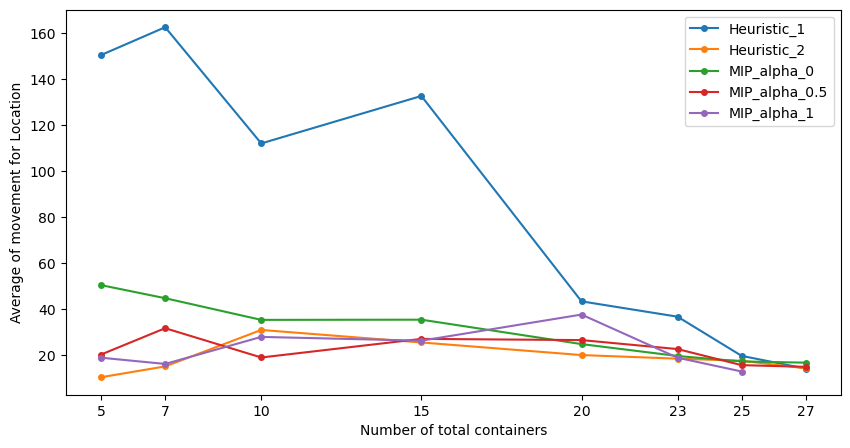

In [17]:
plt.figure(figsize=(10, 5))
# scatter line plot
_markersize = 4

plt.plot(grouped_heuristic_1_df['total_cont_num'], grouped_heuristic_1_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='Heuristic_1')
plt.plot(grouped_heuristic_2_df['total_cont_num'], grouped_heuristic_2_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='Heuristic_2')
plt.plot(grouped_mip_alpha_0_df['total_cont_num'], grouped_mip_alpha_0_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='MIP_alpha_0')
plt.plot(grouped_mip_alpha_05_df['total_cont_num'], grouped_mip_alpha_05_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='MIP_alpha_0.5')
plt.plot(grouped_mip_alpha_1_df['total_cont_num'], grouped_mip_alpha_1_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='MIP_alpha_1')

plt.xlabel('Number of total containers')
plt.ylabel('Average of movement for Location')
# x축 눈금 조정
plt.xticks(grouped_heuristic_1_df['total_cont_num'])
plt.legend()
plt.show()

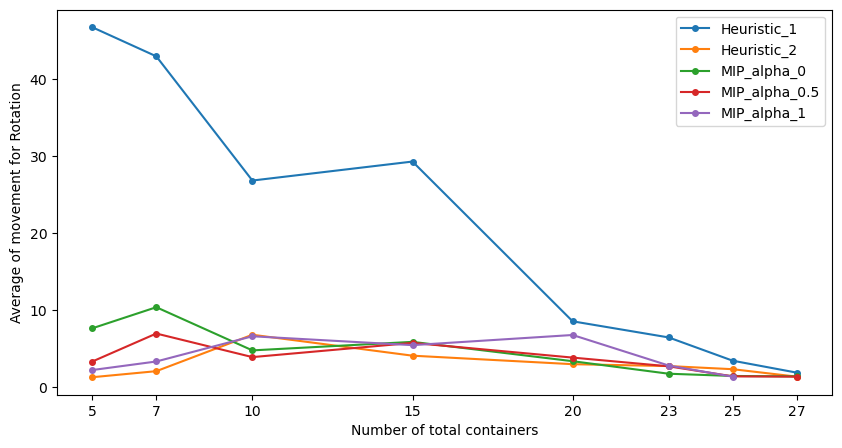

In [19]:
plt.figure(figsize=(10, 5))
# scatter line plot
_markersize = 4

plt.plot(grouped_heuristic_1_df['total_cont_num'], grouped_heuristic_1_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='Heuristic_1')
plt.plot(grouped_heuristic_2_df['total_cont_num'], grouped_heuristic_2_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='Heuristic_2')
plt.plot(grouped_mip_alpha_0_df['total_cont_num'], grouped_mip_alpha_0_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_0')
plt.plot(grouped_mip_alpha_05_df['total_cont_num'], grouped_mip_alpha_05_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_0.5')
plt.plot(grouped_mip_alpha_1_df['total_cont_num'], grouped_mip_alpha_1_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_1')

plt.xlabel('Number of total containers')
plt.ylabel('Average of movement for Rotation')
# x축 눈금 조정
plt.xticks(grouped_heuristic_1_df['total_cont_num'])
plt.legend()
plt.show()

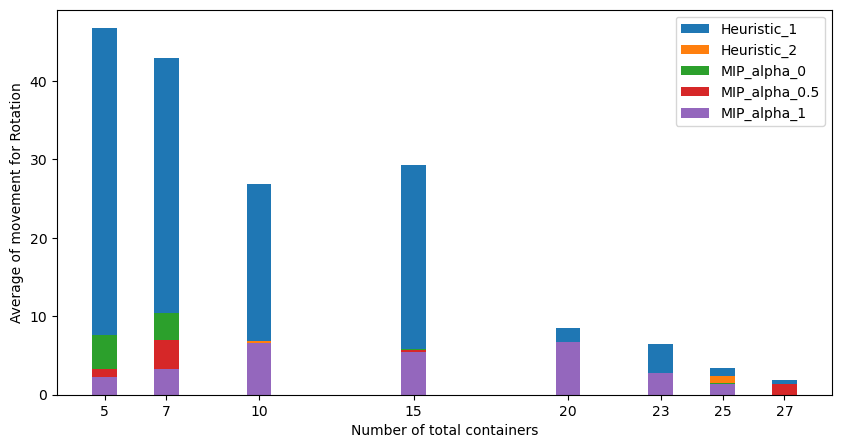

In [25]:
plt.figure(figsize=(10, 5))
# scatter line plot
_markersize = 4

plt.bar(grouped_heuristic_1_df['total_cont_num'], grouped_heuristic_1_df['Dist_Move_Rot'], label='Heuristic_1')
plt.bar(grouped_heuristic_2_df['total_cont_num'], grouped_heuristic_2_df['Dist_Move_Rot'], label='Heuristic_2')
plt.bar(grouped_mip_alpha_0_df['total_cont_num'], grouped_mip_alpha_0_df['Dist_Move_Rot'], label='MIP_alpha_0')
plt.bar(grouped_mip_alpha_05_df['total_cont_num'], grouped_mip_alpha_05_df['Dist_Move_Rot'], label='MIP_alpha_0.5')
plt.bar(grouped_mip_alpha_1_df['total_cont_num'], grouped_mip_alpha_1_df['Dist_Move_Rot'], label='MIP_alpha_1')

plt.xlabel('Number of total containers')
plt.ylabel('Average of movement for Rotation')
# x축 눈금 조정
plt.xticks(grouped_heuristic_1_df['total_cont_num'])
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
# scatter line plot
_markersize = 4

plt.plot(grouped_heuristic_1_df['total_cont_num'], grouped_heuristic_1_df['Dist'], marker = 'o', markersize = _markersize, label='Heuristic_1')
plt.plot(grouped_heuristic_2_df['total_cont_num'], grouped_heuristic_2_df['Avg_Move_Rot'], marker = 'o', markersize = _markersize, label='Heuristic_2')
plt.plot(grouped_mip_alpha_0_df['total_cont_num'], grouped_mip_alpha_0_df['Avg_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_0')
plt.plot(grouped_mip_alpha_05_df['total_cont_num'], grouped_mip_alpha_05_df['Avg_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_0.5')
plt.plot(grouped_mip_alpha_1_df['total_cont_num'], grouped_mip_alpha_1_df['Avg_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_1')

plt.xlabel('Number of total containers')
plt.ylabel('Average of movement for Location')
# x축 눈금 조정
plt.xticks(grouped_heuristic_1_df['total_cont_num'])
plt.legend()
plt.show()

In [5]:
mip_df = pd.DataFrame()

method_folder_name = 'MIP'

mip_path = f'Ungrouped_Result/{method_folder_name}'


# Get initial folder list
initial_folder_list = os.listdir(mip_path)

for initial_folder_name in initial_folder_list:
    
    initial_cont_num = int(initial_folder_name.split('_')[1])
    total_cont_num = int(initial_folder_name.split('(')[0].split('_')[-1])
    new_cont_num = total_cont_num - initial_cont_num
    
    initial_folder_path = os.path.join(mip_path, initial_folder_name)
    print('initial_folder_path:', initial_folder_path)
    
    # Get new folder list
    new_folder_list = os.listdir(initial_folder_path)
    print('new_folder_list:', new_folder_list)
    
    for new_folder_name in new_folder_list:
        new_folder_path = os.path.join(initial_folder_path, new_folder_name)
        print('new_folder_path:', new_folder_path)
        
        alpha_beta_folder_lsit = os.listdir(new_folder_path)
            
        for alpha_beta_folder_name in alpha_beta_folder_lsit:
            alpha_value = alpha_beta_folder_name.split('_')[1]
            beta_value = alpha_beta_folder_name.split('_')[3]
            
            alpha_beta_folder_path = os.path.join(new_folder_path, alpha_beta_folder_name)
            
            # Get only .csv files
            csv_list = [csv for csv in os.listdir(alpha_beta_folder_path) if csv.endswith('.csv')]
            print('csv_list:', csv_list)
            
            for csv_name in csv_list:

                ex_num = int(csv_name.split('.')[0].split('_ex')[1])
                csv_path = os.path.join(alpha_beta_folder_path, csv_name)

                # Read csv file
                csv_df = pd.read_csv(csv_path)
                
                csv_df['total_cont_num'] = total_cont_num
                csv_df['initial_cont_num'] = initial_cont_num
                csv_df['new_cont_num'] = new_cont_num
                csv_df['ex_num'] = ex_num
                csv_df['method'] = method_folder_name
                csv_df['alpha'] = alpha_value
                csv_df['beta'] = beta_value
                
                # concat csv_data to data
                mip_df = pd.concat([mip_df, csv_df]).reset_index(drop=True)
                
mip_df

initial_folder_path: Ungrouped_Result/MIP\Initial_0_Output_Data_10(stack_6_tier_5)
new_folder_list: ['New_10']
new_folder_path: Ungrouped_Result/MIP\Initial_0_Output_Data_10(stack_6_tier_5)\New_10
csv_list: ['Configuration_ex1.csv', 'Configuration_ex10.csv', 'Configuration_ex11.csv', 'Configuration_ex12.csv', 'Configuration_ex13.csv', 'Configuration_ex14.csv', 'Configuration_ex15.csv', 'Configuration_ex16.csv', 'Configuration_ex17.csv', 'Configuration_ex18.csv', 'Configuration_ex19.csv', 'Configuration_ex2.csv', 'Configuration_ex20.csv', 'Configuration_ex21.csv', 'Configuration_ex22.csv', 'Configuration_ex23.csv', 'Configuration_ex24.csv', 'Configuration_ex25.csv', 'Configuration_ex26.csv', 'Configuration_ex27.csv', 'Configuration_ex28.csv', 'Configuration_ex29.csv', 'Configuration_ex3.csv', 'Configuration_ex30.csv', 'Configuration_ex4.csv', 'Configuration_ex5.csv', 'Configuration_ex6.csv', 'Configuration_ex7.csv', 'Configuration_ex8.csv', 'Configuration_ex9.csv']
csv_list: ['Configura

,Idx,Initial_Loc_x,Initial_Loc_y,Initial_Loc_z,Initial_Rot_x,Initial_Rot_y,Initial_Rot_z,Later_Loc_x,Later_Loc_y,Later_Loc_z,...,Emerg,Reloc,Size(ft),total_cont_num,initial_cont_num,new_cont_num,ex_num,method,alpha,beta
0,1,994.400024,0.0,110.800003,0.0,0.0,0.0,994.384888,-0.003606,110.873047,...,0,1.0,1,10,0,10,1,MIP,0.5,0.5
1,2,497.200012,0.0,110.800003,0.0,0.0,0.0,509.414368,-0.284981,111.537521,...,0,2.0,2,10,0,10,1,MIP,0.5,0.5
2,3,497.200012,0.0,332.400024,0.0,0.0,0.0,511.521057,-0.279049,333.126373,...,0,3.0,3,10,0,10,1,MIP,0.5,0.5
3,4,745.800049,0.0,110.800003,0.0,0.0,0.0,745.742798,-0.003565,110.867485,...,0,4.0,4,10,0,10,1,MIP,0.5,0.5
4,5,248.600006,0.0,110.800003,0.0,0.0,0.0,280.787903,-1.059648,111.487228,...,0,5.0,5,10,0,10,1,MIP,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37655,19,1243.000000,0.0,775.600037,0.0,0.0,0.0,1505.608887,0.248149,767.587280,...,0,12.0,12,23,7,16,9,MIP,1,0
37656,20,745.800049,0.0,997.200012,0.0,0.0,0.0,1277.727173,1.024363,854.119202,...,0,13.0,13,23,7,16,9,MIP,1,0
37657,21,1491.600098,0.0,775.600037,0.0,0.0,0.0,1747.530884,1.047365,766.190918,...,0,14.0,14,23,7,16,9,MIP,1,0
37658,22,1243.000000,0.0,997.200012,0.0,0.0,0.0,1563.295288,0.889231,1017.562378,...,0,15.0,15,23,7,16,9,MIP,1,0


In [6]:
mip_df['total_cont_num'].unique()

array([10, 15, 20, 23, 25, 27,  5,  7], dtype=int64)

In [7]:
# delete space in column name
mip_df.columns = [col.replace(' ', '') for col in mip_df.columns]
mip_df.columns

Index(['Idx', 'Initial_Loc_x', 'Initial_Loc_y', 'Initial_Loc_z',
       'Initial_Rot_x', 'Initial_Rot_y', 'Initial_Rot_z', 'Later_Loc_x',
       'Later_Loc_y', 'Later_Loc_z', 'Later_Rot_x', 'Later_Rot_y',
       'Later_Rot_z', 'Weight(kg)', 'Seq', 'Emerg', 'Reloc', 'Size(ft)',
       'total_cont_num', 'initial_cont_num', 'new_cont_num', 'ex_num',
       'method', 'alpha', 'beta'],
      dtype='object')

In [8]:
mip_df_25cont = mip_df[mip_df['total_cont_num'] == 25].reset_index(drop=True)
mip_df_25cont

,Idx,Initial_Loc_x,Initial_Loc_y,Initial_Loc_z,Initial_Rot_x,Initial_Rot_y,Initial_Rot_z,Later_Loc_x,Later_Loc_y,Later_Loc_z,...,Emerg,Reloc,Size(ft),total_cont_num,initial_cont_num,new_cont_num,ex_num,method,alpha,beta
0,1,1243.000000,0.0,110.800003,0.0,0.0,0.0,1243.488281,-0.039993,110.477028,...,0,1.0,1,25,0,25,1,MIP,0.5,0.5
1,2,497.200012,0.0,110.800003,0.0,0.0,0.0,521.887207,0.012913,113.880981,...,0,2.0,2,25,0,25,1,MIP,0.5,0.5
2,3,1243.000000,0.0,332.400024,0.0,0.0,0.0,1245.397339,-0.038918,331.924225,...,0,3.0,3,25,0,25,1,MIP,0.5,0.5
3,4,1243.000000,0.0,554.000000,0.0,0.0,0.0,1247.257446,-0.096240,553.426575,...,0,4.0,4,25,0,25,1,MIP,0.5,0.5
4,5,745.800049,0.0,110.800003,0.0,0.0,0.0,751.850281,-0.164253,112.599113,...,0,5.0,5,25,0,25,1,MIP,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,21,745.800049,0.0,775.600037,0.0,0.0,0.0,793.310974,-0.320255,777.033264,...,0,21.0,21,25,0,25,9,MIP,1,0
2196,22,248.600006,0.0,997.200012,0.0,0.0,0.0,346.459869,-0.376355,1013.229004,...,0,22.0,22,25,0,25,9,MIP,1,0
2197,23,1243.000000,0.0,332.400024,0.0,0.0,0.0,1244.172607,-0.101439,331.490082,...,0,23.0,23,25,0,25,9,MIP,1,0
2198,24,1243.000000,0.0,554.000000,0.0,0.0,0.0,1245.327271,-0.167161,553.015869,...,0,24.0,24,25,0,25,9,MIP,1,0


In [76]:
import numpy as np

In [110]:
def get_move_loc_rot(_df):
    _df['Move_Loc_x'] = abs(_df['Initial_Loc_x'] - _df['Later_Loc_x'])
    _df['Move_Loc_y'] = abs(_df['Initial_Loc_y'] - _df['Later_Loc_y'])
    _df['Move_Loc_z'] = abs(_df['Initial_Loc_z'] - _df['Later_Loc_z'])
    _df['Move_Rot_x'] = abs(_df['Initial_Rot_x'] - _df['Later_Rot_x'])
    _df['Move_Rot_y'] = abs(_df['Initial_Rot_y'] - _df['Later_Rot_y'])
    _df['Move_Rot_z'] = abs(_df['Initial_Rot_z'] - _df['Later_Rot_z'])
    _df['Dist_Move_Loc'] = np.sqrt(_df['Move_Loc_x'] ** 2 + _df['Move_Loc_y'] ** 2 + _df['Move_Loc_z'] ** 2)
    _df['Dist_Move_Rot'] = np.sqrt(_df['Move_Rot_x'] ** 2 + _df['Move_Rot_y'] ** 2 + _df['Move_Rot_z'] ** 2)
    _df['Sum_Move_Loc'] = sum([_df['Move_Loc_x'], _df['Move_Loc_y'], _df['Move_Loc_z']])
    _df['Sum_Move_Rot'] = sum([_df['Move_Rot_x'], _df['Move_Rot_y'], _df['Move_Rot_z']])
    _df['Avg_Move_Loc'] = _df['Sum_Move_Loc'] / 3
    _df['Avg_Move_Rot'] = _df['Sum_Move_Rot'] / 3

In [111]:
get_move_loc_rot(heuristic_1_df)
get_move_loc_rot(mip_df)

In [165]:
heuristic_1_df_reloc = heuristic_1_df.groupby(['total_cont_num', 'initial_cont_num', 'new_cont_num', 'ex_num'])['Reloc'].sum().reset_index()
heuristic_1_df_reloc

,total_cont_num,initial_cont_num,new_cont_num,ex_num,Reloc
0,5,0,5,1,15.0
1,5,0,5,2,15.0
2,5,0,5,3,15.0
3,5,0,5,4,15.0
4,5,0,5,5,15.0
...,...,...,...,...,...
1045,27,15,12,26,78.0
1046,27,15,12,27,78.0
1047,27,15,12,28,78.0
1048,27,15,12,29,78.0


In [112]:
grouped_heuristic_1_df = heuristic_1_df.groupby(['total_cont_num', 'initial_cont_num', 'new_cont_num', 'ex_num'])['Dist_Move_Loc', 'Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
grouped_heuristic_1_df

<ipython-input-112-554f54447cbc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_heuristic_1_df = heuristic_1_df.groupby(['total_cont_num', 'initial_cont_num', 'new_cont_num', 'ex_num'])['Dist_Move_Loc', 'Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,total_cont_num,initial_cont_num,new_cont_num,ex_num,Dist_Move_Loc,Dist_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,5,0,5,1,4.930797,1.026224,2.082230,0.344306
1,5,0,5,2,9.663722,2.087543,4.152319,0.697073
2,5,0,5,3,593.517512,115.457186,227.694718,56.004295
3,5,0,5,4,311.509668,116.999926,138.690011,62.966870
4,5,0,5,5,620.606268,115.590049,235.886708,52.557371
...,...,...,...,...,...,...,...,...
1045,27,15,12,26,33.255819,3.061444,12.243400,1.036505
1046,27,15,12,27,29.777743,2.828898,11.185627,0.953894
1047,27,15,12,28,22.116456,2.533196,8.495837,0.853623
1048,27,15,12,29,30.776530,2.934703,11.536441,0.990422


In [113]:
heuristic_1_df_cont_15 = grouped_heuristic_1_df[grouped_heuristic_1_df['total_cont_num'] == 15]
heuristic_1_df_cont_15

,total_cont_num,initial_cont_num,new_cont_num,ex_num,Dist_Move_Loc,Dist_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
270,15,0,15,1,246.371655,74.606202,98.744127,36.743013
271,15,0,15,2,172.422304,14.448627,72.286184,4.837065
272,15,0,15,3,46.915424,23.845840,16.422922,11.923099
273,15,0,15,4,50.384395,6.567066,19.553256,2.199625
274,15,0,15,5,201.614297,43.012523,90.864698,20.710292
...,...,...,...,...,...,...,...,...
415,15,10,5,26,581.965272,128.669875,252.400163,67.275623
416,15,10,5,27,62.084713,6.866125,23.164777,2.302409
417,15,10,5,28,619.285868,126.705834,259.650669,64.304376
418,15,10,5,29,698.382206,131.819314,308.347863,69.580857


In [114]:
grouped_heuristic_1_cont15_df = heuristic_1_df_cont_15.groupby(['initial_cont_num', 'new_cont_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
grouped_heuristic_1_cont15_df

<ipython-input-114-fb34b4188088>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_heuristic_1_cont15_df = heuristic_1_df_cont_15.groupby(['initial_cont_num', 'new_cont_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,initial_cont_num,new_cont_num,Dist_Move_Loc,Dist_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,15,135.531327,25.116722,57.057227,11.496917
1,3,12,153.449879,30.168232,64.718814,14.433460
2,5,10,261.162841,54.713128,110.971382,27.331937
3,7,8,297.592093,58.361460,127.165987,29.192488
4,10,5,438.989275,93.509834,188.973090,47.751535


In [116]:
grouped_mip_df = mip_df.groupby(['total_cont_num', 'initial_cont_num', 'new_cont_num', 'alpha', 'beta', 'ex_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
grouped_mip_df

<ipython-input-116-5c31cdbf523d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_mip_df = mip_df.groupby(['total_cont_num', 'initial_cont_num', 'new_cont_num', 'alpha', 'beta', 'ex_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,total_cont_num,initial_cont_num,new_cont_num,alpha,beta,ex_num,Dist_Move_Loc,Dist_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,5,0,5,0,1,1,930.172410,132.110204,356.721105,70.004065
1,5,0,5,0,1,2,400.351705,138.413861,161.236173,70.131166
2,5,0,5,0,1,3,304.480703,112.007588,127.365032,58.687422
3,5,0,5,0,1,4,514.777396,214.601165,209.753859,118.943999
4,5,0,5,0,1,5,534.049558,52.560165,207.766417,24.189913
...,...,...,...,...,...,...,...,...,...,...
2383,27,0,27,0.5,0.5,17,16.794609,1.286011,6.442643,0.446183
2384,27,0,27,0.5,0.5,18,25.332132,2.266677,9.409470,0.773504
2385,27,0,27,0.5,0.5,19,21.341813,1.669199,7.920412,0.569582
2386,27,0,27,0.5,0.5,20,20.513447,1.504052,7.582501,0.514301


In [117]:
grouped_heuristic_1_df['total_cont_num'].unique()

array([ 5,  7, 10, 15, 20, 23, 25, 27], dtype=int64)

In [118]:
avg_loc_heuristic_1_df = grouped_heuristic_1_df.groupby(['total_cont_num'])['Dist_Move_Loc', 'Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
avg_loc_heuristic_1_df

<ipython-input-118-3042bfb6ad18>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_loc_heuristic_1_df = grouped_heuristic_1_df.groupby(['total_cont_num'])['Dist_Move_Loc', 'Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,total_cont_num,Dist_Move_Loc,Dist_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,5,291.037701,79.418479,115.262165,41.868601
1,7,282.701217,73.550176,116.584649,38.352269
2,10,250.838903,60.982052,105.358551,31.142924
3,15,257.345083,52.373875,109.777300,26.041267
4,20,148.168438,27.945768,61.055908,13.116320
5,23,86.640835,14.400913,35.059300,6.467025
6,25,56.278562,7.936167,21.913087,3.202465
7,27,27.164764,3.045907,10.137084,1.057862


In [119]:
grouped_mip_df['total_cont_num'].unique()

array([ 5,  7, 10, 15, 20, 23, 25, 27], dtype=int64)

In [130]:
grouped_mip_df['initial_cont_num'].unique()

array([ 0,  2,  3,  4,  5,  7, 10, 15], dtype=int64)

In [131]:
grouped_mip_df['new_cont_num'].unique()

array([ 5,  3,  2,  7, 10, 15, 12,  8, 20, 17, 13, 23, 18, 16, 25, 27],
      dtype=int64)

In [120]:
grouped_mip_alpha_0_df = grouped_mip_df[grouped_mip_df['alpha'] == "0"].reset_index(drop=True)
grouped_mip_alpha_05_df = grouped_mip_df[grouped_mip_df['alpha'] == "0.5"].reset_index(drop=True)
grouped_mip_alpha_1_df = grouped_mip_df[grouped_mip_df['alpha'] == "1"].reset_index(drop=True)

In [121]:
avg_loc_mip_alpha_0_df = grouped_mip_alpha_0_df.groupby(['total_cont_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
avg_loc_mip_alpha_05_df = grouped_mip_alpha_05_df.groupby(['total_cont_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
avg_loc_mip_alpha_1_df = grouped_mip_alpha_1_df.groupby(['total_cont_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()

<ipython-input-121-56c2c1694a7e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_loc_mip_alpha_0_df = grouped_mip_alpha_0_df.groupby(['total_cont_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
<ipython-input-121-56c2c1694a7e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_loc_mip_alpha_05_df = grouped_mip_alpha_05_df.groupby(['total_cont_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
<ipython-input-121-56c2c1694a7e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_loc_mip_alpha_1_df = grouped_mip_alpha_1_df.groupby(['total_cont_num'])['Dist_Move_Loc','Dist_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


In [122]:
print(avg_loc_mip_alpha_0_df)

   total_cont_num  Dist_Move_Loc  Dist_Move_Rot  Avg_Move_Loc  Avg_Move_Rot
0               5     261.642414      43.403882    101.156706     21.894570
1               7     202.458330      36.415967     81.478619     18.088638
2              10     140.861883      22.198867     57.418962     10.940278
3              15      89.505093      13.928341     36.762764      6.616730
4              20      55.599776       7.363356     22.420380      3.232191
5              23      41.039548       3.933010     15.965977      1.599091
6              25      25.273686       1.691727      9.342046      0.578235
7              27      21.700853       1.767407      8.032685      0.676461


In [123]:
mip_alpha_0_cont_15_df = grouped_mip_alpha_0_df[grouped_mip_alpha_0_df['total_cont_num'] == 15]
mip_alpha_05_cont_15_df = grouped_mip_alpha_05_df[grouped_mip_alpha_05_df['total_cont_num'] == 15]
mip_alpha_1_cont_15_df = grouped_mip_alpha_1_df[grouped_mip_alpha_1_df['total_cont_num'] == 15]

In [124]:
grouped_mip_alpha_0_cont_15_df = mip_alpha_0_cont_15_df.groupby(['initial_cont_num', 'new_cont_num'])['Avg_Move_Loc'].mean().reset_index()
grouped_mip_alpha_05_cont_15_df = mip_alpha_05_cont_15_df.groupby(['initial_cont_num', 'new_cont_num'])['Avg_Move_Loc'].mean().reset_index()
grouped_mip_alpha_1_cont_15_df = mip_alpha_1_cont_15_df.groupby(['initial_cont_num', 'new_cont_num'])['Avg_Move_Loc'].mean().reset_index()

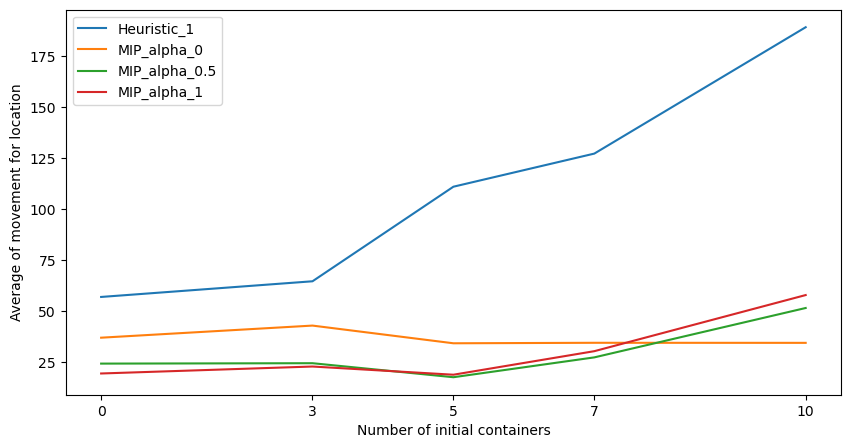

In [132]:
# x-axis : initial_cont_num
# y-axis : Avg_Move_Loc

plt.figure(figsize=(10, 5))
# scatter line plot
plt.plot(grouped_heuristic_1_cont15_df['initial_cont_num'], grouped_heuristic_1_cont15_df['Avg_Move_Loc'], label='Heuristic_1')
plt.plot(grouped_mip_alpha_0_cont_15_df['initial_cont_num'], grouped_mip_alpha_0_cont_15_df['Avg_Move_Loc'], label='MIP_alpha_0')
plt.plot(grouped_mip_alpha_05_cont_15_df['initial_cont_num'], grouped_mip_alpha_05_cont_15_df['Avg_Move_Loc'], label='MIP_alpha_0.5')
plt.plot(grouped_mip_alpha_1_cont_15_df['initial_cont_num'], grouped_mip_alpha_1_cont_15_df['Avg_Move_Loc'], label='MIP_alpha_1')
plt.xlabel('Number of initial containers')
plt.ylabel('Average of movement for location')

# x축 눈금 조정
plt.xticks(grouped_heuristic_1_cont15_df['initial_cont_num'])
plt.legend()
plt.show()

In [140]:
avg_loc_heuristic_1_df = avg_loc_heuristic_1_df[avg_loc_heuristic_1_df['total_cont_num'] != 27]
avg_loc_mip_alpha_0_df = avg_loc_mip_alpha_0_df[avg_loc_mip_alpha_0_df['total_cont_num'] != 27]
avg_loc_mip_alpha_05_df = avg_loc_mip_alpha_05_df[avg_loc_mip_alpha_05_df['total_cont_num'] != 27]
avg_loc_mip_alpha_1_df = avg_loc_mip_alpha_1_df[avg_loc_mip_alpha_1_df['total_cont_num'] != 27]

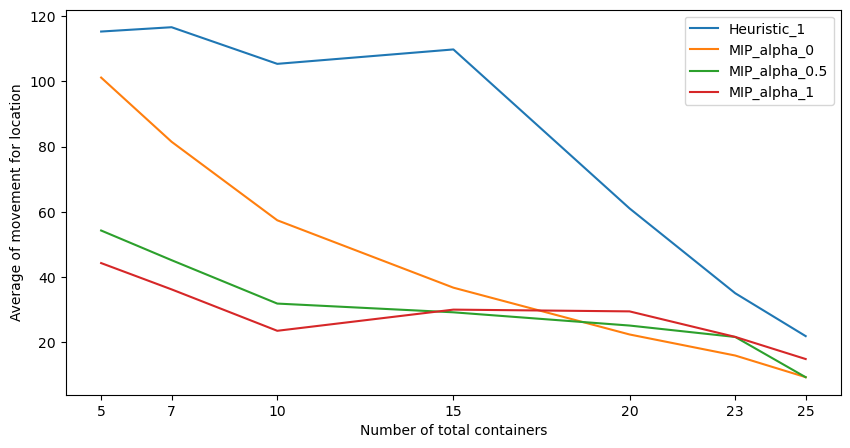

In [142]:
# x-axis : initial_cont_num
# y-axis : Avg_Move_Loc

plt.figure(figsize=(10, 5))
# scatter line plot
plt.plot(avg_loc_heuristic_1_df['total_cont_num'], avg_loc_heuristic_1_df['Avg_Move_Loc'], label='Heuristic_1')
plt.plot(avg_loc_mip_alpha_0_df['total_cont_num'], avg_loc_mip_alpha_0_df['Avg_Move_Loc'], label='MIP_alpha_0')
plt.plot(avg_loc_mip_alpha_05_df['total_cont_num'], avg_loc_mip_alpha_05_df['Avg_Move_Loc'], label='MIP_alpha_0.5')
plt.plot(avg_loc_mip_alpha_1_df['total_cont_num'], avg_loc_mip_alpha_1_df['Avg_Move_Loc'], label='MIP_alpha_1')
plt.xlabel('Number of total containers')
plt.ylabel('Average of movement for location')

# x축 눈금 조정
plt.xticks(avg_loc_heuristic_1_df['total_cont_num'])
plt.legend()
plt.show()

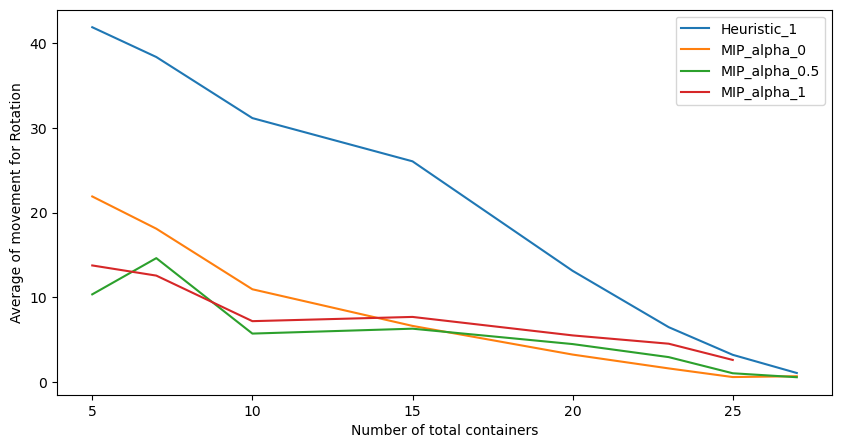

In [127]:
plt.figure(figsize=(10, 5))
# scatter line plot
plt.plot(avg_loc_heuristic_1_df['total_cont_num'], avg_loc_heuristic_1_df['Avg_Move_Rot'], label='Heuristic_1')
plt.plot(avg_loc_mip_alpha_0_df['total_cont_num'], avg_loc_mip_alpha_0_df['Avg_Move_Rot'], label='MIP_alpha_0')
plt.plot(avg_loc_mip_alpha_05_df['total_cont_num'], avg_loc_mip_alpha_05_df['Avg_Move_Rot'], label='MIP_alpha_0.5')
plt.plot(avg_loc_mip_alpha_1_df['total_cont_num'], avg_loc_mip_alpha_1_df['Avg_Move_Rot'], label='MIP_alpha_1')
plt.xlabel('Number of total containers')
plt.ylabel('Average of movement for Rotation')
# x축 눈금 조정
plt.xticks(avg_loc_heuristic_1_df['total_cont_num'])
plt.legend()
plt.show()

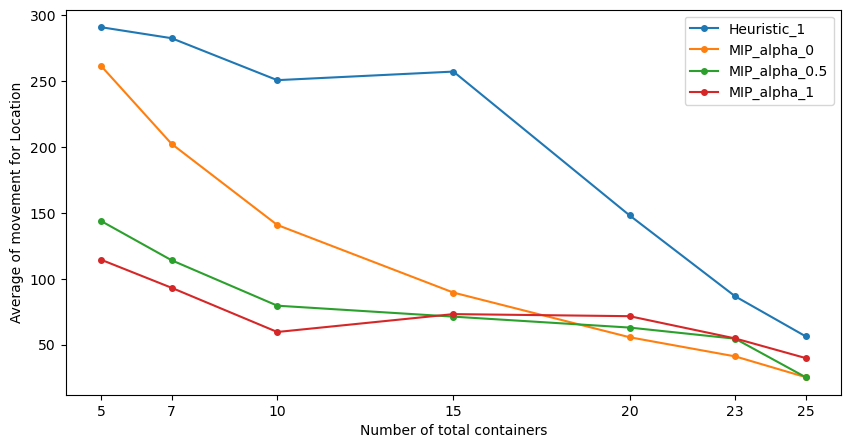

In [151]:
plt.figure(figsize=(10, 5))
# scatter line plot
_markersize = 4

plt.plot(avg_loc_heuristic_1_df['total_cont_num'], avg_loc_heuristic_1_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='Heuristic_1')
plt.plot(avg_loc_mip_alpha_0_df['total_cont_num'], avg_loc_mip_alpha_0_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='MIP_alpha_0')
plt.plot(avg_loc_mip_alpha_05_df['total_cont_num'], avg_loc_mip_alpha_05_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='MIP_alpha_0.5')
plt.plot(avg_loc_mip_alpha_1_df['total_cont_num'], avg_loc_mip_alpha_1_df['Dist_Move_Loc'], marker = 'o', markersize = _markersize, label='MIP_alpha_1')
plt.xlabel('Number of total containers')
plt.ylabel('Average of movement for Location')
# x축 눈금 조정
plt.xticks(avg_loc_heuristic_1_df['total_cont_num'])
plt.legend()
plt.show()

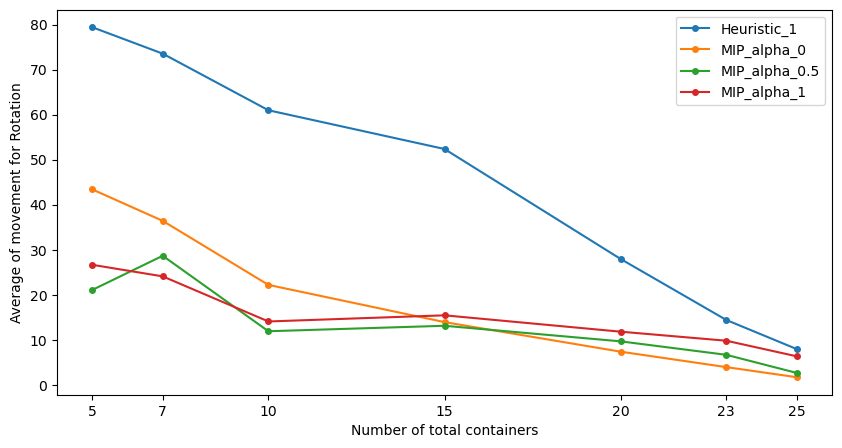

In [153]:
plt.figure(figsize=(10, 5))
# scatter line plot
plt.plot(avg_loc_heuristic_1_df['total_cont_num'], avg_loc_heuristic_1_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='Heuristic_1')
plt.plot(avg_loc_mip_alpha_0_df['total_cont_num'], avg_loc_mip_alpha_0_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_0')
plt.plot(avg_loc_mip_alpha_05_df['total_cont_num'], avg_loc_mip_alpha_05_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_0.5')
plt.plot(avg_loc_mip_alpha_1_df['total_cont_num'], avg_loc_mip_alpha_1_df['Dist_Move_Rot'], marker = 'o', markersize = _markersize, label='MIP_alpha_1')
plt.xlabel('Number of total containers')
plt.ylabel('Average of movement for Rotation')
# x축 눈금 조정
plt.xticks(avg_loc_heuristic_1_df['total_cont_num'])
plt.legend()
plt.show()

In [21]:
grouped_mip_alpha_0_df

,total_cont_num,initial_cont_num,new_cont_num,alpha,beta,ex_num,Avg_Move_Loc
0,5,0,5,0,1,1,356.721105
1,5,0,5,0,1,2,161.236173
2,5,0,5,0,1,3,127.365032
3,5,0,5,0,1,4,209.753859
4,5,0,5,0,1,5,207.766417
...,...,...,...,...,...,...,...
805,27,0,27,0,1,26,6.997528
806,27,0,27,0,1,27,10.625145
807,27,0,27,0,1,28,8.630234
808,27,0,27,0,1,29,7.573338


In [25]:
heuristic_2_df.columns = [col.replace(' ', '') for col in heuristic_2_df.columns]

In [26]:
get_move_loc_rot(heuristic_1_df_25cont)
get_move_loc_rot(heuristic_2_df)
get_move_loc_rot(mip_df_25cont)

In [27]:
mip_df_25cont.columns

Index(['Idx', 'Initial_Loc_x', 'Initial_Loc_y', 'Initial_Loc_z',
       'Initial_Rot_x', 'Initial_Rot_y', 'Initial_Rot_z', 'Later_Loc_x',
       'Later_Loc_y', 'Later_Loc_z', 'Later_Rot_x', 'Later_Rot_y',
       'Later_Rot_z', 'Weight(kg)', 'Seq', 'Emerg', 'Reloc', 'Size(ft)',
       'total_cont_num', 'initial_cont_num', 'new_cont_num', 'ex_num',
       'method', 'alpha', 'beta', 'Move_Loc_x', 'Move_Loc_y', 'Move_Loc_z',
       'Move_Rot_x', 'Move_Rot_y', 'Move_Rot_z', 'Sum_Move_Loc',
       'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'],
      dtype='object')

In [28]:
mip_df_25_cont_grouped = mip_df_25cont.groupby(['initial_cont_num', 'new_cont_num', 'ex_num', 'alpha', 'beta'])['Reloc', 'Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
mip_df_25_cont_grouped

<ipython-input-28-4b99cad01dff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mip_df_25_cont_grouped = mip_df_25cont.groupby(['initial_cont_num', 'new_cont_num', 'ex_num', 'alpha', 'beta'])['Reloc', 'Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,initial_cont_num,new_cont_num,ex_num,alpha,beta,Reloc,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,1,0,1,13.0,35.217520,2.225912,11.739173,0.741971
1,0,25,1,0.5,0.5,13.0,34.577490,1.694267,11.525830,0.564756
2,0,25,1,1,0,13.0,84.724986,23.396161,28.241662,7.798720
3,0,25,2,0,1,13.0,24.508046,0.783569,8.169349,0.261190
4,0,25,2,0.5,0.5,13.0,35.437013,2.740325,11.812338,0.913442
...,...,...,...,...,...,...,...,...,...,...
83,0,25,28,1,0,13.0,53.577675,20.285101,17.859225,6.761700
84,0,25,29,0,1,13.0,26.923414,1.644952,8.974471,0.548317
85,0,25,29,1,0,13.0,52.387738,4.907844,17.462579,1.635948
86,0,25,30,0,1,13.0,26.613530,1.999873,8.871177,0.666624


In [29]:
heuristic_1_df_25_cont_grouped = heuristic_1_df_25cont.groupby(['initial_cont_num', 'new_cont_num', 'ex_num'])['Reloc', 'Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
heuristic_1_df_25_cont_grouped

<ipython-input-29-47eab183bd0a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  heuristic_1_df_25_cont_grouped = heuristic_1_df_25cont.groupby(['initial_cont_num', 'new_cont_num', 'ex_num'])['Reloc', 'Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,initial_cont_num,new_cont_num,ex_num,Reloc,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,1,13.0,445.799000,84.309027,148.599667,28.103009
1,0,25,2,13.0,38.536625,3.967419,12.845542,1.322473
2,0,25,3,13.0,32.565612,5.867839,10.855204,1.955946
3,0,25,4,13.0,28.307464,4.297083,9.435821,1.432361
4,0,25,5,13.0,57.063241,5.624432,19.021080,1.874811
...,...,...,...,...,...,...,...,...
145,15,10,26,2.2,49.476356,4.021050,16.492119,1.340350
146,15,10,27,2.2,250.807310,27.953527,83.602437,9.317842
147,15,10,28,2.2,25.343695,2.222235,8.447898,0.740745
148,15,10,29,2.2,41.598058,3.869349,13.866019,1.289783


In [30]:
heuristic_2_df_grouped = heuristic_2_df.groupby(['initial_cont_num', 'new_cont_num', 'ex_num'])['Reloc', 'Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
heuristic_2_df_grouped

<ipython-input-30-4d5a6bcff9a4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  heuristic_2_df_grouped = heuristic_2_df.groupby(['initial_cont_num', 'new_cont_num', 'ex_num'])['Reloc', 'Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,initial_cont_num,new_cont_num,ex_num,Reloc,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,1,0.16,24.220977,3.569147,8.073659,1.189716
1,0,25,2,0.16,16.813541,1.820413,5.604514,0.606804
2,0,25,3,0.40,10.053331,0.926665,3.351110,0.308888
3,0,25,4,0.24,14.516080,1.232491,4.838693,0.410830
4,0,25,5,0.08,19.424884,1.807198,6.474961,0.602399
...,...,...,...,...,...,...,...,...
145,15,10,26,0.44,10.248558,1.024679,3.416186,0.341560
146,15,10,27,0.56,11.068153,1.061589,3.689384,0.353863
147,15,10,28,0.48,11.974165,0.973272,3.991388,0.324424
148,15,10,29,0.40,16.424784,1.446177,5.474928,0.482059


In [31]:
mip_df_25_cont_grouped.dtypes

initial_cont_num      int64
new_cont_num          int64
ex_num                int64
alpha                object
beta                 object
Reloc               float64
Sum_Move_Loc        float64
Sum_Move_Rot        float64
Avg_Move_Loc        float64
Avg_Move_Rot        float64
dtype: object

In [32]:
mip_df_25_cont_grouped_alpha_0 = mip_df_25_cont_grouped[mip_df_25_cont_grouped['alpha'] == "0"].reset_index(drop=True)
mip_df_25_cont_grouped_alpha_05 = mip_df_25_cont_grouped[mip_df_25_cont_grouped['alpha'] == "0.5"].reset_index(drop=True)
mip_df_25_cont_grouped_alpha_1 = mip_df_25_cont_grouped[mip_df_25_cont_grouped['alpha'] == "1"].reset_index(drop=True)

In [33]:
mip_df_25_cont_grouped_alpha_0.head()

,initial_cont_num,new_cont_num,ex_num,alpha,beta,Reloc,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,1,0,1,13.0,35.217520,2.225912,11.739173,0.741971
1,0,25,2,0,1,13.0,24.508046,0.783569,8.169349,0.261190
2,0,25,3,0,1,13.0,21.632331,1.752827,7.210777,0.584276
3,0,25,4,0,1,13.0,24.458285,1.851542,8.152762,0.617181
4,0,25,5,0,1,13.0,49.116406,3.833896,16.372135,1.277965


In [34]:
heuristic_1_initial_0_25cont_df = heuristic_1_df_25_cont_grouped[heuristic_1_df_25_cont_grouped['initial_cont_num'] == 0]
heuristic_2_initial_0_df = heuristic_2_df_grouped[heuristic_2_df_grouped['initial_cont_num'] == 0]

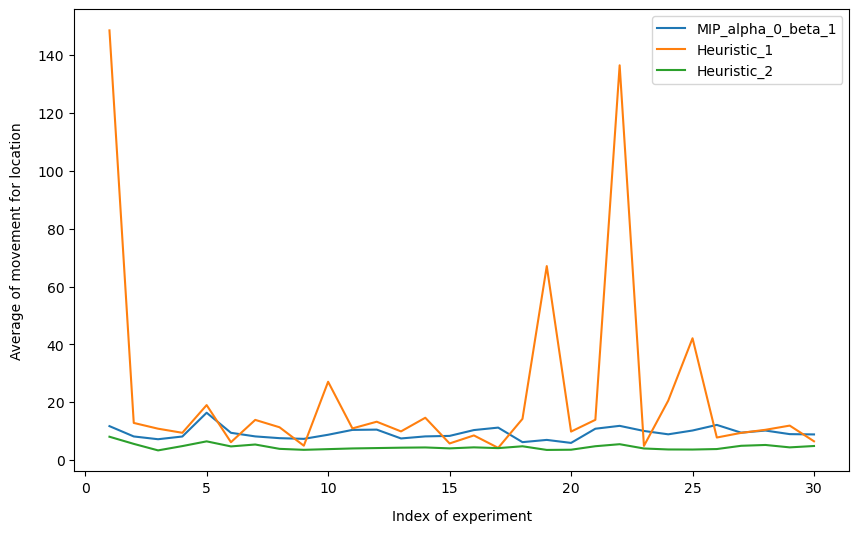

In [35]:
# x-axis : ex_num, y-axis : Avg_Move_Loc

# set figure size
plt.figure(figsize=(10, 6))

plt.plot(mip_df_25_cont_grouped_alpha_0['ex_num'], mip_df_25_cont_grouped_alpha_0['Avg_Move_Loc'], label='MIP_alpha_0_beta_1')
# plt.plot(mip_df_25_cont_grouped_alpha_05['ex_num'], mip_df_25_cont_grouped_alpha_05['Avg_Move_Loc'], label='MIP_alpha_0.5_beta_0.5')
# plt.plot(mip_df_25_cont_grouped_alpha_1['ex_num'], mip_df_25_cont_grouped_alpha_1['Avg_Move_Loc'], label='MIP_alpha_1_beta_0')
plt.plot(heuristic_1_initial_0_25cont_df['ex_num'], heuristic_1_initial_0_25cont_df['Avg_Move_Loc'], label='Heuristic_1')
plt.plot(heuristic_2_initial_0_df['ex_num'], heuristic_2_initial_0_df['Avg_Move_Loc'], label='Heuristic_2')

plt.xlabel('Index of experiment', labelpad= 10)
plt.ylabel('Average of movement for location', labelpad=10)

plt.legend(loc = 'upper right')

plt.show()


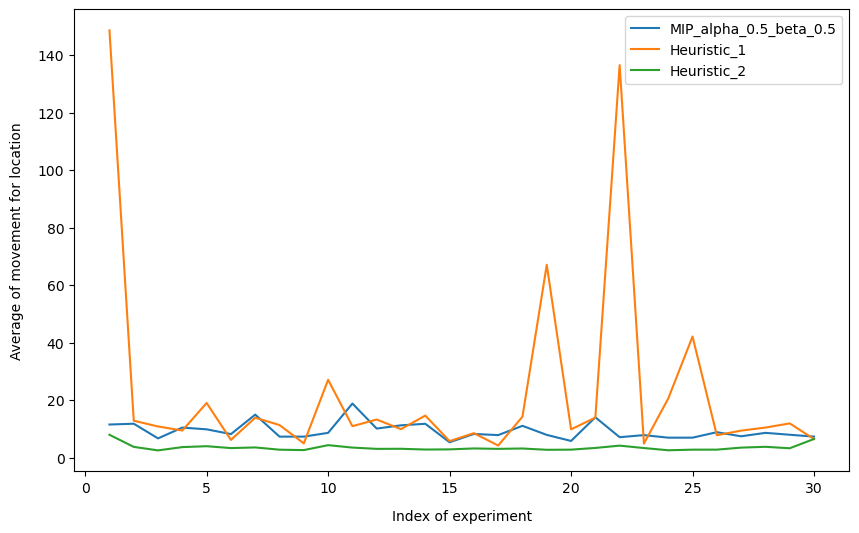

In [84]:
# x-axis : ex_num, y-axis : Avg_Move_Loc

# set figure size
plt.figure(figsize=(10, 6))

# plt.plot(mip_df_25_cont_grouped_alpha_0['ex_num'], mip_df_25_cont_grouped_alpha_0['Avg_Move_Loc'], label='MIP_alpha_0_beta_1')
plt.plot(mip_df_25_cont_grouped_alpha_05['ex_num'], mip_df_25_cont_grouped_alpha_05['Avg_Move_Loc'], label='MIP_alpha_0.5_beta_0.5')
# plt.plot(mip_df_25_cont_grouped_alpha_1['ex_num'], mip_df_25_cont_grouped_alpha_1['Avg_Move_Loc'], label='MIP_alpha_1_beta_0')
plt.plot(heuristic_1_initial_0_25cont_df['ex_num'], heuristic_1_initial_0_25cont_df['Avg_Move_Loc'], label='Heuristic_1')
plt.plot(heuristic_2_initial_0_df['ex_num'], heuristic_2_initial_0_df['Avg_Move_Loc'], label='Heuristic_2')

plt.xlabel('Index of experiment', labelpad= 10)
plt.ylabel('Average of movement for location', labelpad=10)

plt.legend(loc = 'upper right')

plt.show()


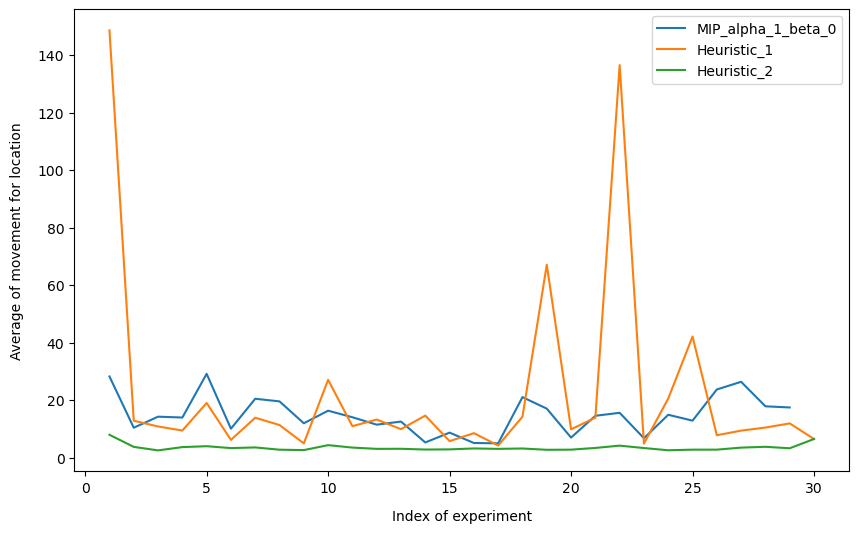

In [85]:
# x-axis : ex_num, y-axis : Avg_Move_Loc

# set figure size
plt.figure(figsize=(10, 6))

# plt.plot(mip_df_25_cont_grouped_alpha_0['ex_num'], mip_df_25_cont_grouped_alpha_0['Avg_Move_Loc'], label='MIP_alpha_0_beta_1')
# plt.plot(mip_df_25_cont_grouped_alpha_05['ex_num'], mip_df_25_cont_grouped_alpha_05['Avg_Move_Loc'], label='MIP_alpha_0.5_beta_0.5')
plt.plot(mip_df_25_cont_grouped_alpha_1['ex_num'], mip_df_25_cont_grouped_alpha_1['Avg_Move_Loc'], label='MIP_alpha_1_beta_0')
plt.plot(heuristic_1_initial_0_25cont_df['ex_num'], heuristic_1_initial_0_25cont_df['Avg_Move_Loc'], label='Heuristic_1')
plt.plot(heuristic_2_initial_0_df['ex_num'], heuristic_2_initial_0_df['Avg_Move_Loc'], label='Heuristic_2')

plt.xlabel('Index of experiment', labelpad= 10)
plt.ylabel('Average of movement for location', labelpad=10)

plt.legend(loc = 'upper right')

plt.show()


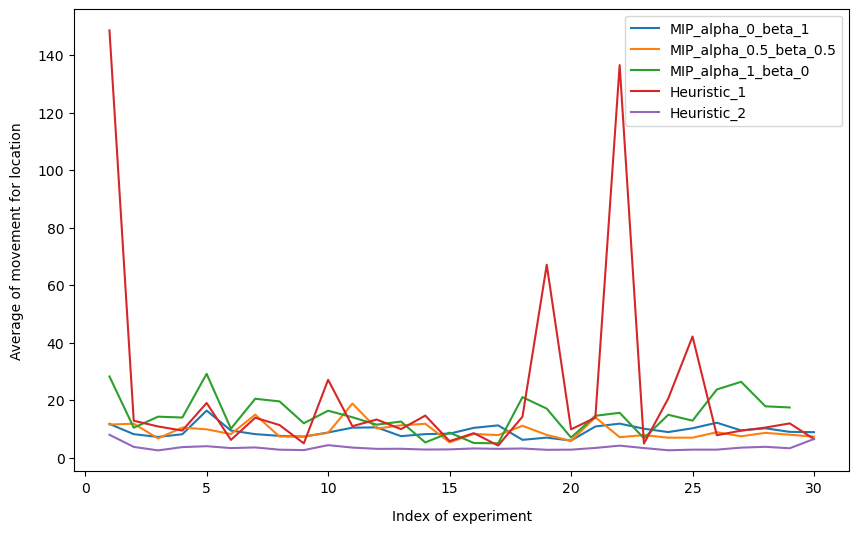

In [87]:
# x-axis : ex_num, y-axis : Avg_Move_Loc

# set figure size
plt.figure(figsize=(10, 6))

plt.plot(mip_df_25_cont_grouped_alpha_0['ex_num'], mip_df_25_cont_grouped_alpha_0['Avg_Move_Loc'], label='MIP_alpha_0_beta_1')
plt.plot(mip_df_25_cont_grouped_alpha_05['ex_num'], mip_df_25_cont_grouped_alpha_05['Avg_Move_Loc'], label='MIP_alpha_0.5_beta_0.5')
plt.plot(mip_df_25_cont_grouped_alpha_1['ex_num'], mip_df_25_cont_grouped_alpha_1['Avg_Move_Loc'], label='MIP_alpha_1_beta_0')
plt.plot(heuristic_1_initial_0_25cont_df['ex_num'], heuristic_1_initial_0_25cont_df['Avg_Move_Loc'], label='Heuristic_1')
plt.plot(heuristic_2_initial_0_df['ex_num'], heuristic_2_initial_0_df['Avg_Move_Loc'], label='Heuristic_2')

plt.xlabel('Index of experiment', labelpad= 10)
plt.ylabel('Average of movement for location', labelpad=10)

plt.legend(loc = 'upper right')

plt.show()


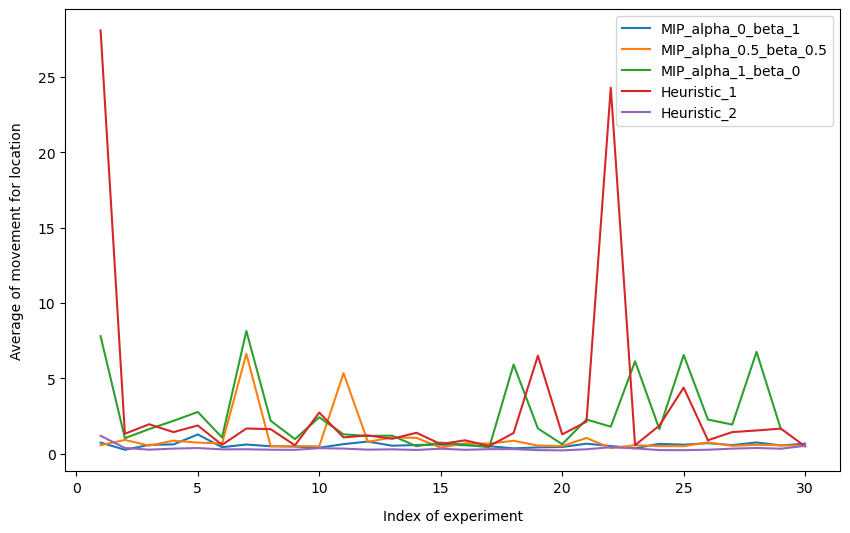

In [89]:
# x-axis : ex_num, y-axis : Avg_Move_Loc

# set figure size
plt.figure(figsize=(10, 6))

plt.plot(mip_df_25_cont_grouped_alpha_0['ex_num'], mip_df_25_cont_grouped_alpha_0['Avg_Move_Rot'], label='MIP_alpha_0_beta_1')
plt.plot(mip_df_25_cont_grouped_alpha_05['ex_num'], mip_df_25_cont_grouped_alpha_05['Avg_Move_Rot'], label='MIP_alpha_0.5_beta_0.5')
plt.plot(mip_df_25_cont_grouped_alpha_1['ex_num'], mip_df_25_cont_grouped_alpha_1['Avg_Move_Rot'], label='MIP_alpha_1_beta_0')
plt.plot(heuristic_1_initial_0_25cont_df['ex_num'], heuristic_1_initial_0_25cont_df['Avg_Move_Rot'], label='Heuristic_1')
plt.plot(heuristic_2_initial_0_df['ex_num'], heuristic_2_initial_0_df['Avg_Move_Rot'], label='Heuristic_2')

plt.xlabel('Index of experiment', labelpad= 10)
plt.ylabel('Average of movement for location', labelpad=10)

plt.legend(loc = 'upper right')

plt.show()


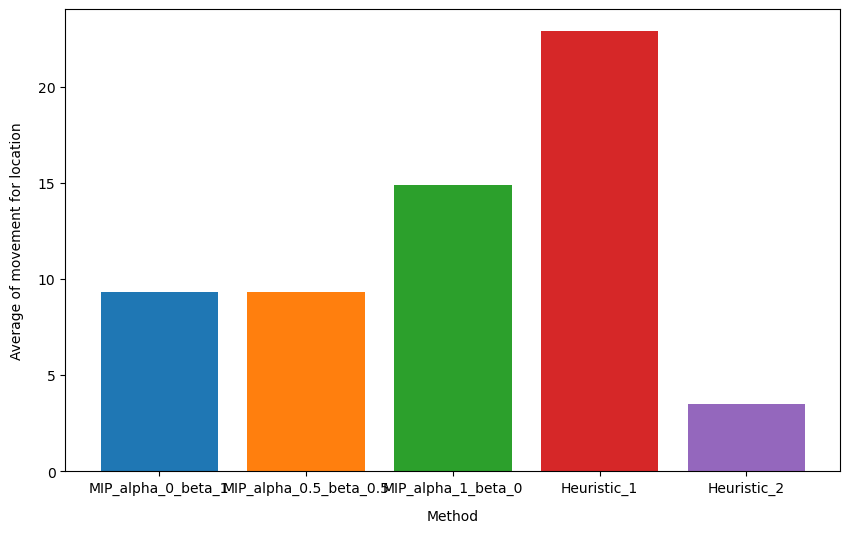

In [95]:
# x-axis : ex_num, y-axis : Avg_Move_Loc

# set figure size
plt.figure(figsize=(10, 6))

plt.bar('MIP_alpha_0_beta_1', mip_df_25_cont_grouped_alpha_0['Avg_Move_Loc'].mean())
plt.bar('MIP_alpha_0.5_beta_0.5', mip_df_25_cont_grouped_alpha_05['Avg_Move_Loc'].mean())
plt.bar('MIP_alpha_1_beta_0', mip_df_25_cont_grouped_alpha_1['Avg_Move_Loc'].mean())
plt.bar('Heuristic_1', heuristic_1_initial_0_25cont_df['Avg_Move_Loc'].mean())
plt.bar('Heuristic_2', heuristic_2_initial_0_df['Avg_Move_Loc'].mean())

plt.xlabel('Method', labelpad= 10)
plt.ylabel('Average of movement for location', labelpad=10)

# plt.legend(loc = 'upper right')

plt.show()


In [56]:
heuristic_1_df['initial_cont_num'].unique()

array([ 0, 10, 15,  2,  3,  4,  5,  7], dtype=int64)

In [55]:
mip_df['initial_cont_num'].unique()

array([ 0, 10, 15,  2,  3,  4,  5,  7], dtype=int64)

In [54]:
mip_df_25_cont_grouped['initial_cont_num'].unique()

array([0], dtype=int64)

In [93]:
# groupby rep, and mean of sum of move loc and rot
mip_data = mip_df.groupby(['initial', 'new', 'alpha', 'beta'])['Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
mip_data

C:\Users\purify\AppData\Local\Temp\ipykernel_15032\2252873065.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mip_data = mip_df.groupby(['initial', 'new', 'alpha', 'beta'])['Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,initial,new,alpha,beta,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,0,1,4.792727,0.506285,1.597576,0.168762
1,0,25,0.5,0.5,5.024057,0.549478,1.674686,0.183159


In [94]:
heuristic_1_data = heuristic_1_df.groupby(['initial', 'new'])['Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()
heuristic_1_data

C:\Users\purify\AppData\Local\Temp\ipykernel_15032\810835577.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  heuristic_1_data = heuristic_1_df.groupby(['initial', 'new'])['Sum_Move_Loc', 'Sum_Move_Rot', 'Avg_Move_Loc', 'Avg_Move_Rot'].mean().reset_index()


,initial,new,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,5.256099,0.525143,1.752033,0.175048
1,10,15,5.289497,0.623096,1.763166,0.207699
2,15,10,4.879605,0.518728,1.626535,0.172909
3,5,20,5.748344,0.617685,1.916115,0.205895
4,7,18,5.009721,0.495544,1.669907,0.165181


In [95]:
heuristic_1_data_initial_0 = heuristic_1_data[heuristic_1_data['initial'] == '0']
heuristic_1_data_initial_0

,initial,new,Sum_Move_Loc,Sum_Move_Rot,Avg_Move_Loc,Avg_Move_Rot
0,0,25,5.256099,0.525143,1.752033,0.175048


c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


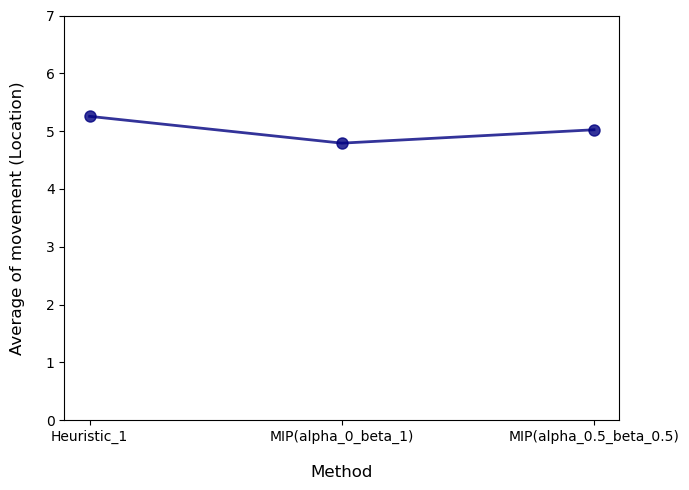

In [87]:
# Prepare data for plotting
methods = ['Heuristic_1'] + [f'MIP(alpha_{a}_beta_{b})' for a, b in zip(mip_data['alpha'], mip_data['beta'])]
loc_values = [heuristic_1_data_initial_0['Sum_Move_Loc']] +  mip_data['Sum_Move_Loc'].tolist()
# rot_values = [heuristic_1_data_initial_0['Sum_Move_Rot']] +  mip_data['Sum_Move_Rot'].tolist()

fig, ax = plt.subplots(figsize=(7, 5))

# Plot the line
ax.plot(methods, loc_values, color='navy', alpha=0.8, linewidth=2, marker='o', markersize=8, linestyle='-')
# ax.twinx().plot(methods, rot_values, color='red', alpha=0.8, linewidth=2, marker='s', markersize=8, linestyle='--')

# Customize labels and limits
ax.set_xlabel('Method', labelpad=15, fontsize=12)
ax.set_ylabel('Average of movement (Location)', labelpad=15, fontsize=12)
ax.set_ylim(0, 7)

# ax.twinx().set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12)
# ax.twinx().set_ylim(0, 0.7)

# Set x-ticks and labels
ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods)

# Show the plot
plt.tight_layout()
plt.show()

c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


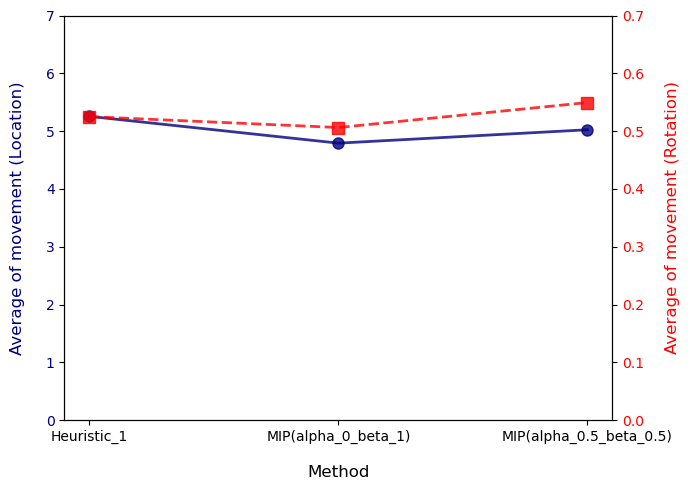

In [96]:
# Prepare data for plotting
methods = ['Heuristic_1'] + [f'MIP(alpha_{a}_beta_{b})' for a, b in zip(mip_data['alpha'], mip_data['beta'])]
loc_values = [heuristic_1_data_initial_0['Sum_Move_Loc']] + mip_data['Sum_Move_Loc'].tolist()
rot_values = [heuristic_1_data_initial_0['Sum_Move_Rot']] + mip_data['Sum_Move_Rot'].tolist()

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot Sum_Move_Loc
ax1.plot(methods, loc_values, color='navy', alpha=0.8, linewidth=2, marker='o', markersize=8, linestyle='-')
ax1.set_xlabel('Method', labelpad=15, fontsize=12)
ax1.set_ylabel('Average of movement (Location)', labelpad=15, fontsize=12, color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_ylim(0, 7)

# Create a second y-axis for Sum_Move_Rot
ax2 = ax1.twinx()
ax2.plot(methods, rot_values, color='red', alpha=0.8, linewidth=2, marker='s', markersize=8, linestyle='--')
ax2.set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.7)

# Set x-ticks and labels
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods)

# Show the plot
plt.tight_layout()
plt.show()

c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


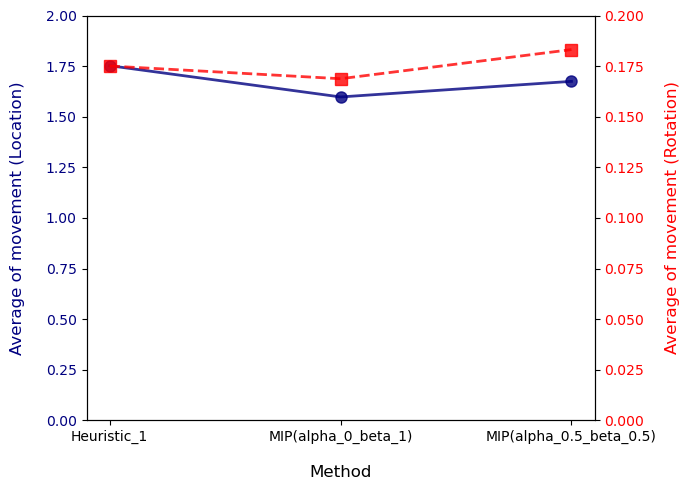

In [98]:
# Prepare data for plotting
methods = ['Heuristic_1'] + [f'MIP(alpha_{a}_beta_{b})' for a, b in zip(mip_data['alpha'], mip_data['beta'])]
loc_values = [heuristic_1_data_initial_0['Avg_Move_Loc']] + mip_data['Avg_Move_Loc'].tolist()
rot_values = [heuristic_1_data_initial_0['Avg_Move_Rot']] + mip_data['Avg_Move_Rot'].tolist()

fig, ax1 = plt.subplots(figsize=(7, 5))

# Plot Sum_Move_Loc
ax1.plot(methods, loc_values, color='navy', alpha=0.8, linewidth=2, marker='o', markersize=8, linestyle='-')
ax1.set_xlabel('Method', labelpad=15, fontsize=12)
ax1.set_ylabel('Average of movement (Location)', labelpad=15, fontsize=12, color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_ylim(0, 2)

# Create a second y-axis for Sum_Move_Rot
ax2 = ax1.twinx()
ax2.plot(methods, rot_values, color='red', alpha=0.8, linewidth=2, marker='s', markersize=8, linestyle='--')
ax2.set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)

# Set x-ticks and labels
ax1.set_xticks(range(len(methods)))
ax1.set_xticklabels(methods)

# Show the plot
plt.tight_layout()
plt.show()

c:\Users\purify\Anaconda3\envs\purify\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


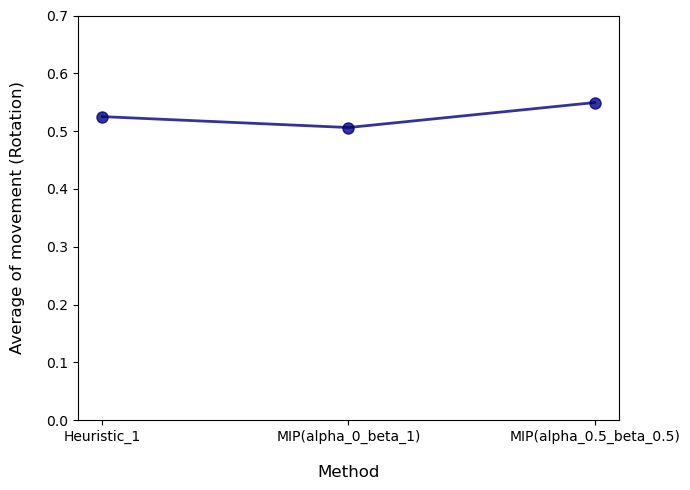

In [81]:
# Prepare data for plotting
methods = ['Heuristic_1'] + [f'MIP(alpha_{a}_beta_{b})' for a, b in zip(mip_data['alpha'], mip_data['beta'])]
values = [heuristic_1_data_initial_0['Sum_Move_Rot']] +  mip_data['Sum_Move_Rot'].tolist()

fig, ax = plt.subplots(figsize=(7, 5))

# Plot the line
ax.plot(methods, values, color='navy', alpha=0.8, linewidth=2, marker='o', markersize=8, linestyle='-')

# Customize labels and limits
ax.set_xlabel('Method', labelpad=15, fontsize=12)
ax.set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12)
ax.set_ylim(0, 0.7)

# Set x-ticks and labels
ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods)

# Show the plot
plt.tight_layout()
plt.show()

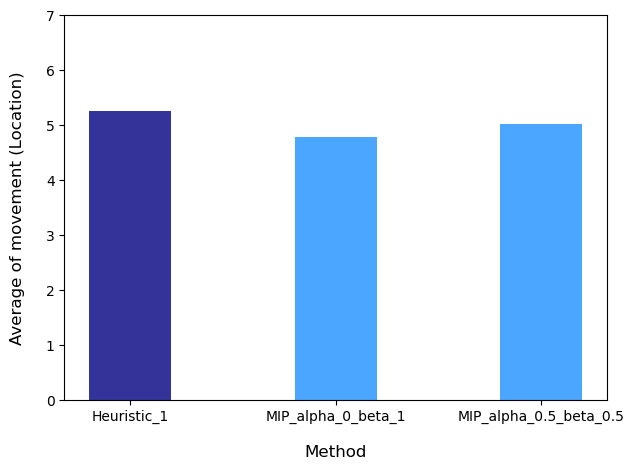

In [65]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar('Heuristic_1', heuristic_1_data_initial_0['Sum_Move_Loc'], label='Heuristic_1', color='navy', alpha=0.8, width = 0.4)

ax.set_xlabel('Method', labelpad=15, fontsize=12)
ax.set_ylabel('Average of movement (Location)', labelpad=15, fontsize=12)
# ylimit
ax.set_ylim(0, 7)
for i in range(len(mip_data)):
    ax.bar(f'MIP_alpha_{mip_data["alpha"][i]}_beta_{mip_data["beta"][i]}', mip_data['Sum_Move_Loc'][i], label=f'MIP_{mip_data["alpha"][i]}_{mip_data["beta"][i]}', alpha=0.8, color='dodgerblue', width = 0.4)

plt.show()


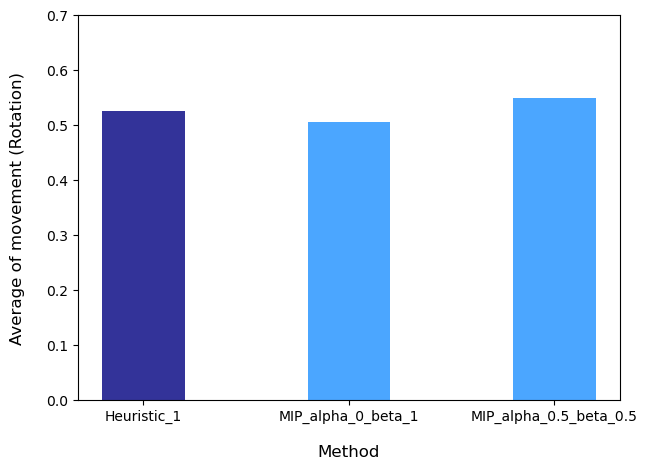

In [66]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar('Heuristic_1', heuristic_1_data_initial_0['Sum_Move_Rot'], label='Heuristic_1', color='navy', alpha=0.8, width = 0.4)

ax.set_xlabel('Method', labelpad=15, fontsize=12)
ax.set_ylabel('Average of movement (Rotation)', labelpad=15, fontsize=12)
# ylimit
ax.set_ylim(0, 0.7)
for i in range(len(mip_data)):
    ax.bar(f'MIP_alpha_{mip_data["alpha"][i]}_beta_{mip_data["beta"][i]}', mip_data['Sum_Move_Rot'][i], label=f'MIP_{mip_data["alpha"][i]}_{mip_data["beta"][i]}', color='dodgerblue', alpha=0.8, width = 0.4)

plt.show()
